In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nrclex
from nrclex import NRCLex
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sns.set(style='whitegrid')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/canova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# ! pip install NRCLex
# ! pip install textblob
# ! python3 -m textblob.download_corpora

In [27]:
df_full = pd.read_csv('data/taylor_swift_full_lyrics.csv')

In [28]:
df_full

,Album,Release Date,Song Title,Featured Artists,Lyrics
0,Taylor Swift (Deluxe),06/11/2007,Tim McGraw,NaN,He said the way my blue eyes shined Put those ...
1,Taylor Swift (Deluxe),06/11/2007,Picture to Burn,NaN,State the obvious I didn t get my perfect fant...
2,Taylor Swift (Deluxe),06/11/2007,Teardrops On My Guitar,NaN,Drew looks at me I fake a smile so he won t se...
3,Taylor Swift (Deluxe),06/11/2007,A Place In This World,NaN,I don t know what I want so don t ask me Cause...
4,Taylor Swift (Deluxe),06/11/2007,Cold as You,NaN,You have a way of coming easily to me And when...
...,...,...,...,...,...
202,Speak Now (Taylor’s Version),07/07/2023,I Can See You (Taylor’s Version) [From The Vault],NaN,I I I I You brush past me in the hallway And y...
203,Speak Now (Taylor’s Version),07/07/2023,Castles Crumbling (Taylor’s Version) [From The...,Hayley Williams,Once I had an empire Once I had an empire Once...
204,Speak Now (Taylor’s Version),07/07/2023,Foolish One (Taylor’s Version) [From The Vault],NaN,My cards are on the table yours are in your ha...
205,Speak Now (Taylor’s Version),07/07/2023,Timeless (Taylor’s Version) [From The Vault],NaN,Down the block there s an antique shop And som...


In [29]:
# Get unique albums
albums = df_full['Album'].unique()
print(albums)
print(len(albums))

['Taylor Swift (Deluxe)' '1989 (Deluxe)' 'reputation' 'Lover'
 'folklore (deluxe version)' 'evermore (deluxe version)'
 'Fearless (Taylor’s Version)' 'Red (Taylor’s Version)'
 'Midnights (3am Edition)' 'Speak Now (Taylor’s Version)']
10


In [60]:
def get_top_n_items(dictionary, n):
    sorted_items = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
    return sorted_items[:n]

In [63]:
def get_lyrics_scores(lyrics):
    words = word_tokenize(lyrics.lower())
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    # print(filtered_words)    
    emotion = NRCLex(lyrics)
    # for word in filtered_words:
    #     emotion = NRCLex(word)
    #     print(word, emotion.words)
    #     print(word, emotion.sentences)
    #     print(word, emotion.affect_list)
    #     print(word, emotion.affect_dict)
    #     print(word, emotion.raw_emotion_scores)
    #     print(word, emotion.top_emotions)
    #     print(word, emotion.affect_frequencies)
    top_3_emotions = get_top_n_items(emotion.raw_emotion_scores, 3)
    return emotion.raw_emotion_scores, emotion.affect_frequencies, emotion.top_emotions, top_3_emotions
    

In [65]:
print(df_full['Song Title'][10])
for i in (get_lyrics_scores(df_full['Lyrics'][10])):
    print(i)

df_copy = df_full.copy()
# For each song in the dataframe create 3 column each one for the top 3 emotions
df_copy['Top 1 Emotion'] = ''
df_copy['Top 2 Emotion'] = ''
df_copy['Top 3 Emotion'] = ''
df_copy['Top 1 Emotion Score'] = 0
df_copy['Top 2 Emotion Score'] = 0
df_copy['Top 3 Emotion Score'] = 0

for index, row in df_copy.iterrows():
    raw_emotion_scores, affect_frequencies, top_emotions, top_3_emotions = get_lyrics_scores(row['Lyrics'])
    df_copy.at[index, 'Top 1 Emotion'] = top_3_emotions[0][0]
    df_copy.at[index, 'Top 2 Emotion'] = top_3_emotions[1][0]
    df_copy.at[index, 'Top 3 Emotion'] = top_3_emotions[2][0]
    df_copy.at[index, 'Top 1 Emotion Score'] = top_3_emotions[0][1]
    df_copy.at[index, 'Top 2 Emotion Score'] = top_3_emotions[1][1]
    df_copy.at[index, 'Top 3 Emotion Score'] = top_3_emotions[2][1]

df_copy

Our Song
{'positive': 23, 'negative': 9, 'trust': 11, 'sadness': 8, 'joy': 9, 'surprise': 6, 'anticipation': 4}
{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.15714285714285714, 'surprise': 0.08571428571428572, 'positive': 0.32857142857142857, 'negative': 0.12857142857142856, 'sadness': 0.11428571428571428, 'disgust': 0.0, 'joy': 0.12857142857142856, 'anticipation': 0.05714285714285714}
[('positive', 0.32857142857142857)]
[('positive', 23), ('trust', 11), ('negative', 9)]


,Album,Release Date,Song Title,Featured Artists,Lyrics,Top 1 Emotion,Top 2 Emotion,Top 3 Emotion,Top 1 Emotion Score,Top 2 Emotion Score,Top 3 Emotion Score
0,Taylor Swift (Deluxe),06/11/2007,Tim McGraw,NaN,He said the way my blue eyes shined Put those ...,anticipation,positive,joy,20,17,16
1,Taylor Swift (Deluxe),06/11/2007,Picture to Burn,NaN,State the obvious I didn t get my perfect fant...,negative,fear,anger,25,20,19
2,Taylor Swift (Deluxe),06/11/2007,Teardrops On My Guitar,NaN,Drew looks at me I fake a smile so he won t se...,positive,joy,trust,18,12,9
3,Taylor Swift (Deluxe),06/11/2007,A Place In This World,NaN,I don t know what I want so don t ask me Cause...,positive,anticipation,negative,5,4,3
4,Taylor Swift (Deluxe),06/11/2007,Cold as You,NaN,You have a way of coming easily to me And when...,negative,positive,sadness,11,10,7
...,...,...,...,...,...,...,...,...,...,...,...
202,Speak Now (Taylor’s Version),07/07/2023,I Can See You (Taylor’s Version) [From The Vault],NaN,I I I I You brush past me in the hallway And y...,positive,trust,joy,11,7,6
203,Speak Now (Taylor’s Version),07/07/2023,Castles Crumbling (Taylor’s Version) [From The...,Hayley Williams,Once I had an empire Once I had an empire Once...,negative,trust,positive,15,14,12
204,Speak Now (Taylor’s Version),07/07/2023,Foolish One (Taylor’s Version) [From The Vault],NaN,My cards are on the table yours are in your ha...,positive,anticipation,joy,24,11,9
205,Speak Now (Taylor’s Version),07/07/2023,Timeless (Taylor’s Version) [From The Vault],NaN,Down the block there s an antique shop And som...,positive,joy,trust,20,14,12


In [99]:
# Create hues based on all the available emotions
emotions = ['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy', 'anticipation']
# Create a color palette
custom_palette = sns.color_palette("Set3", len(emotions))

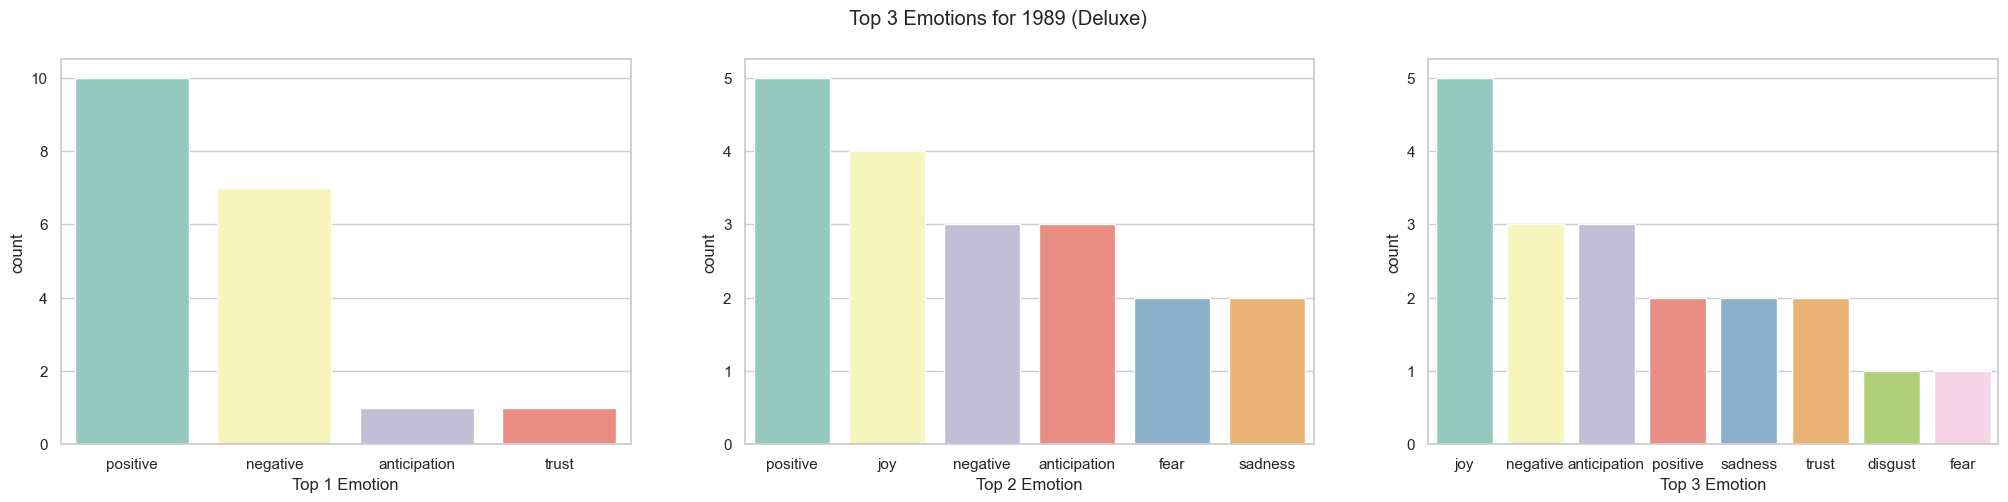

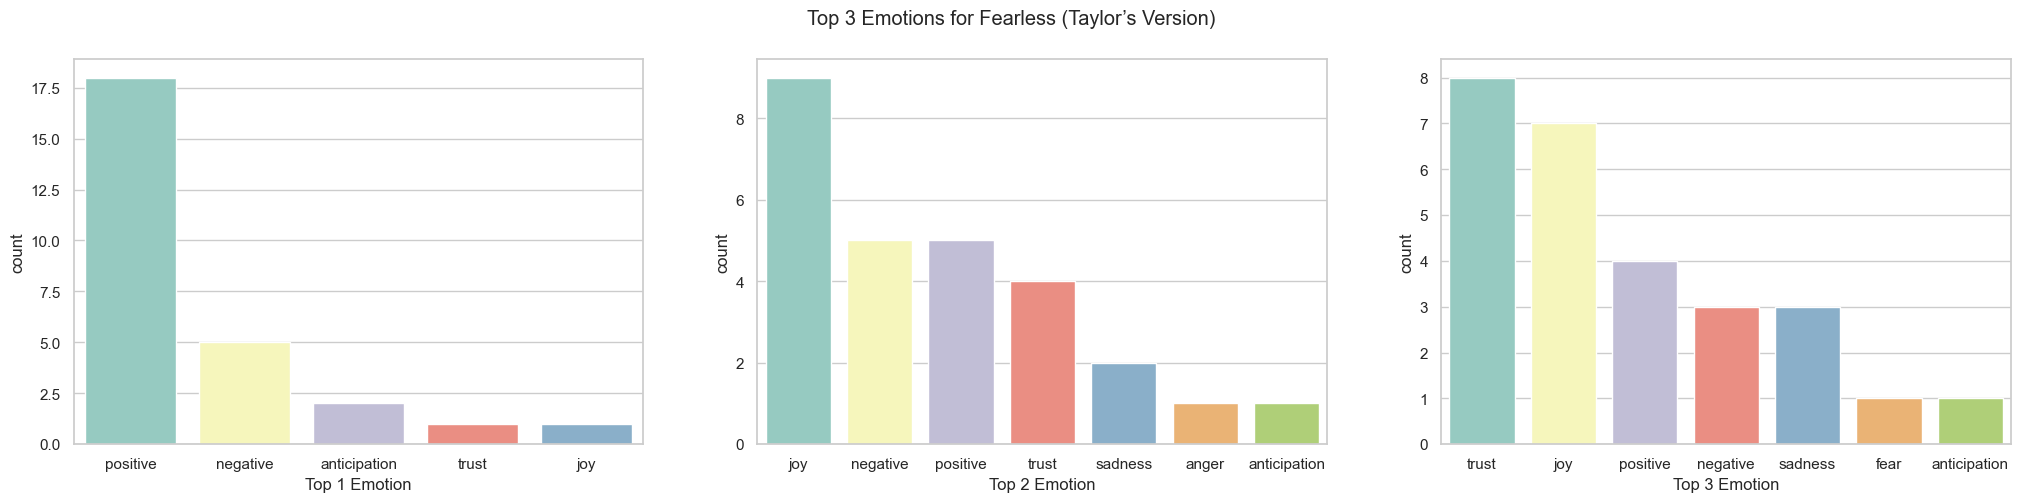

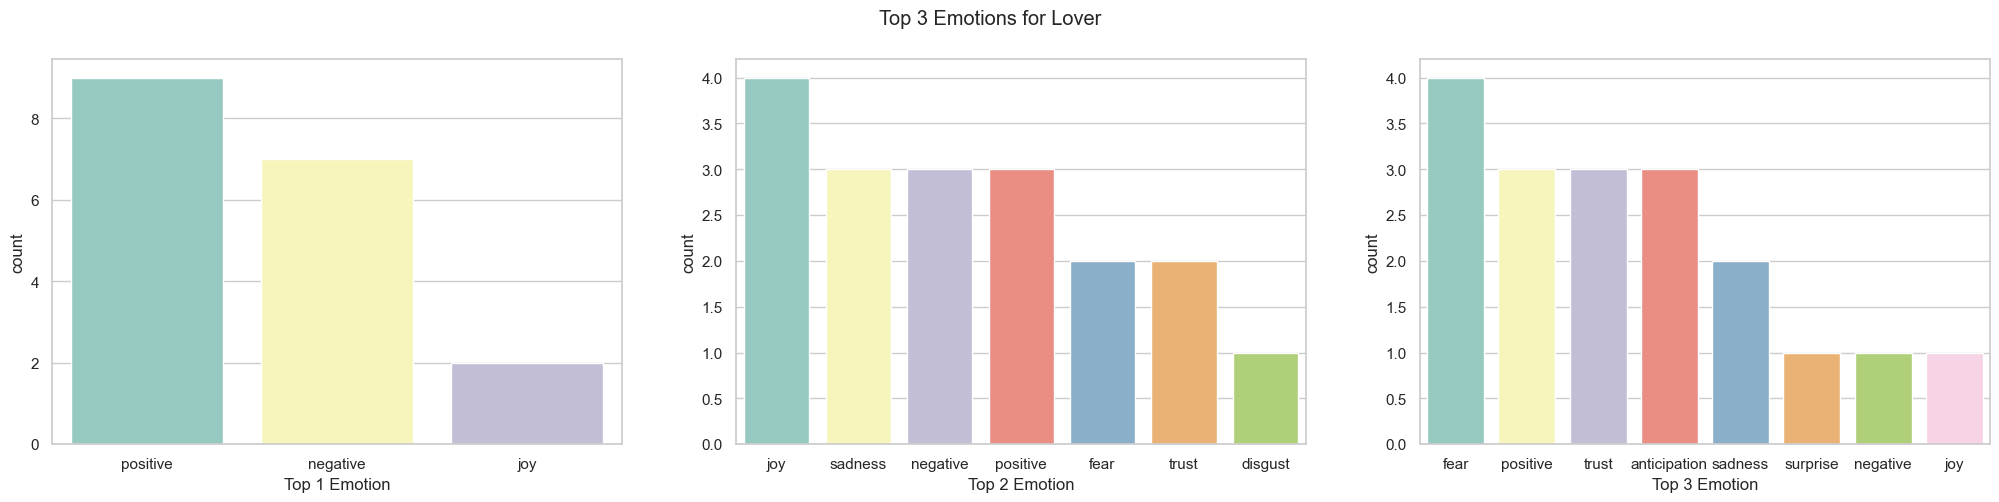

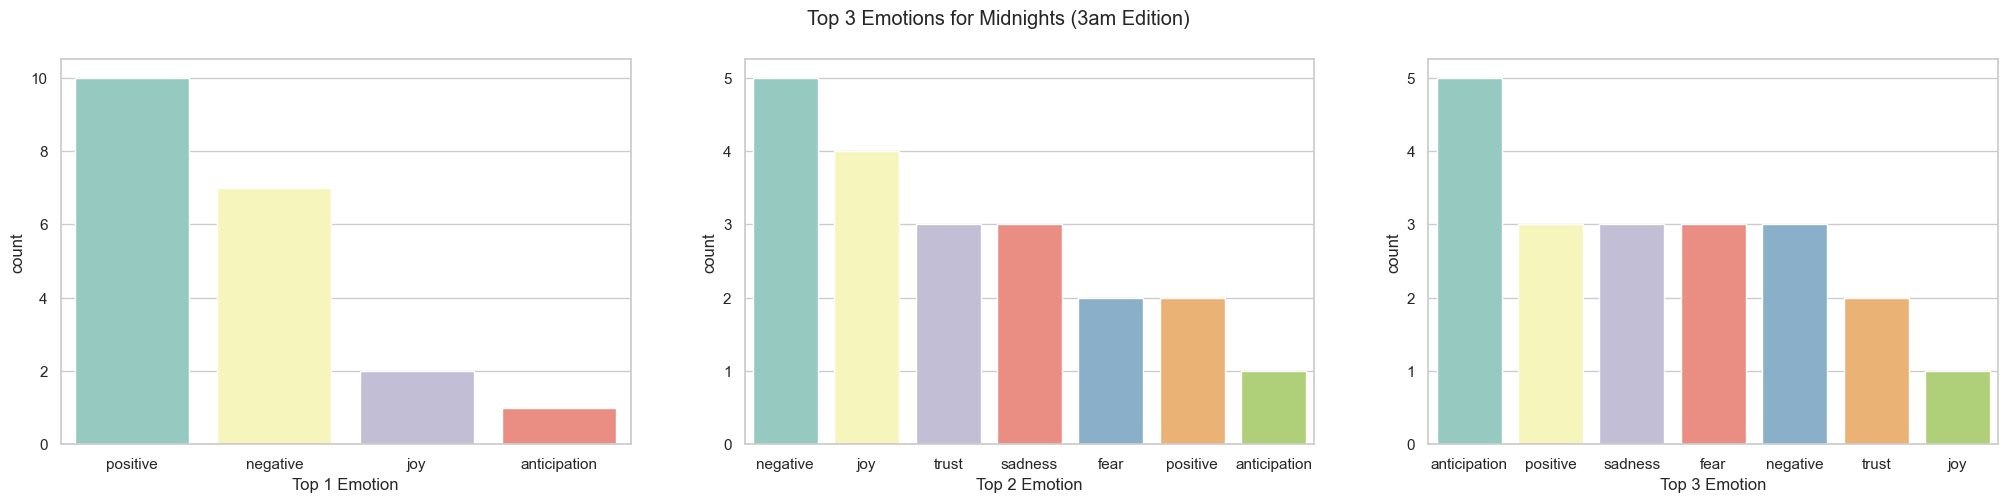

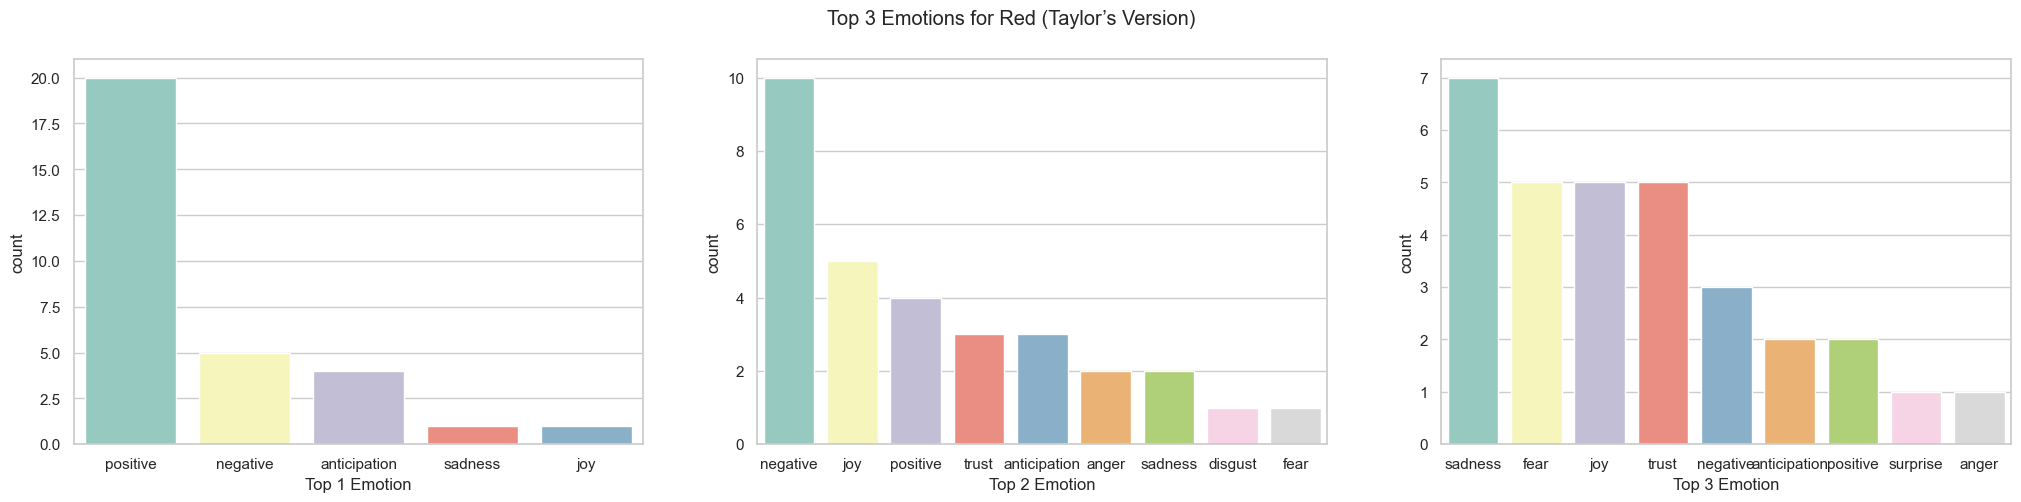

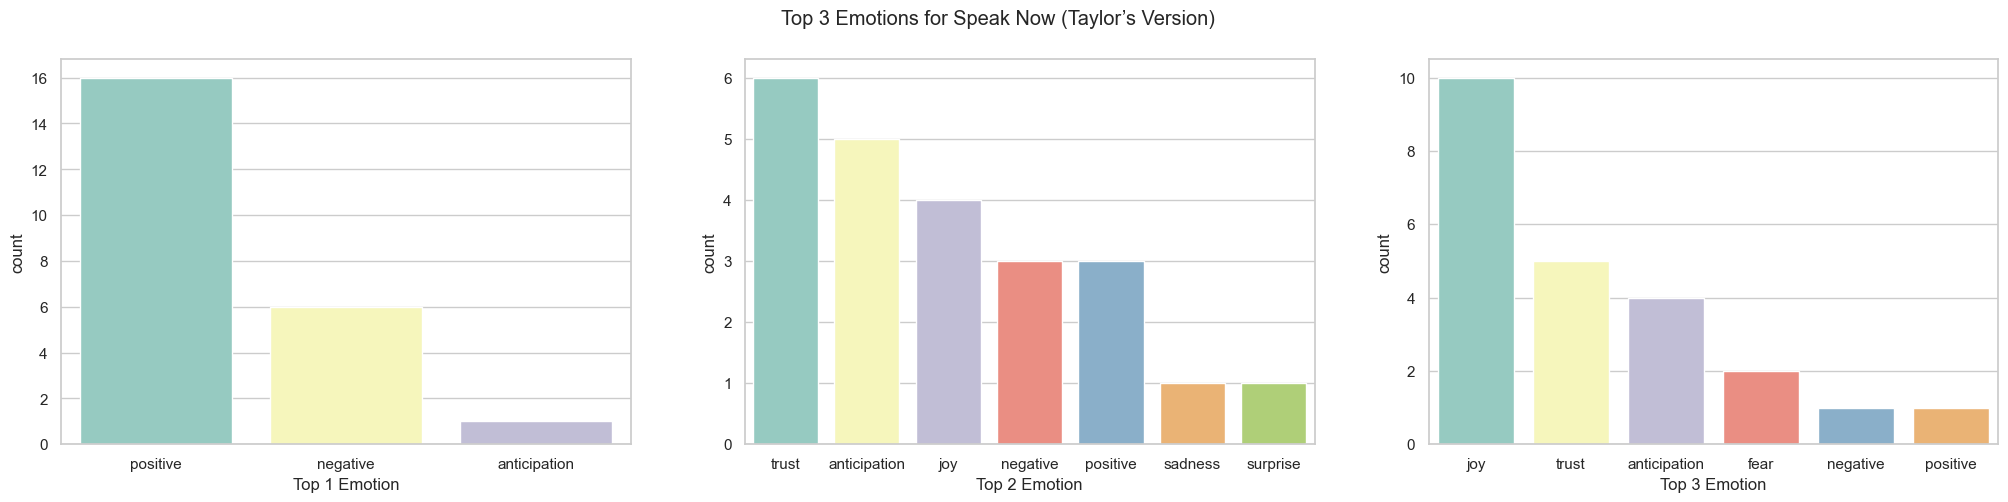

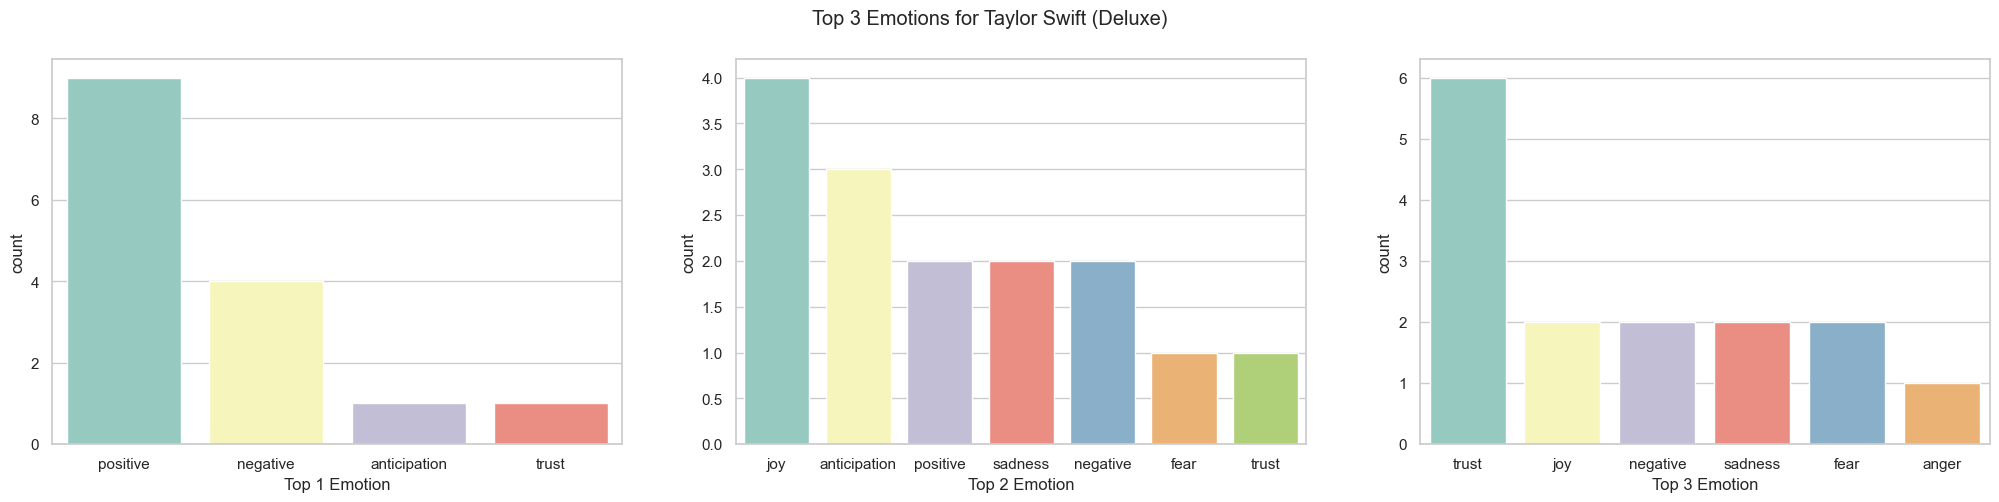

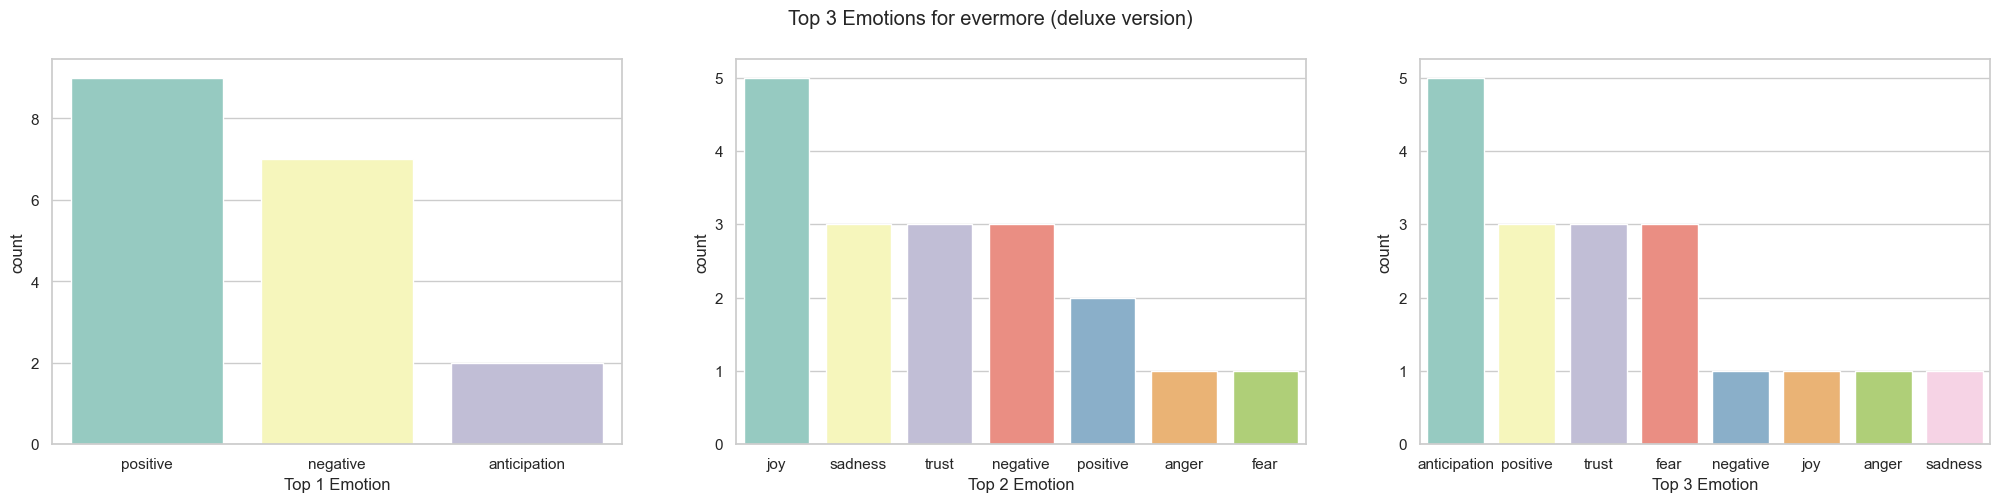

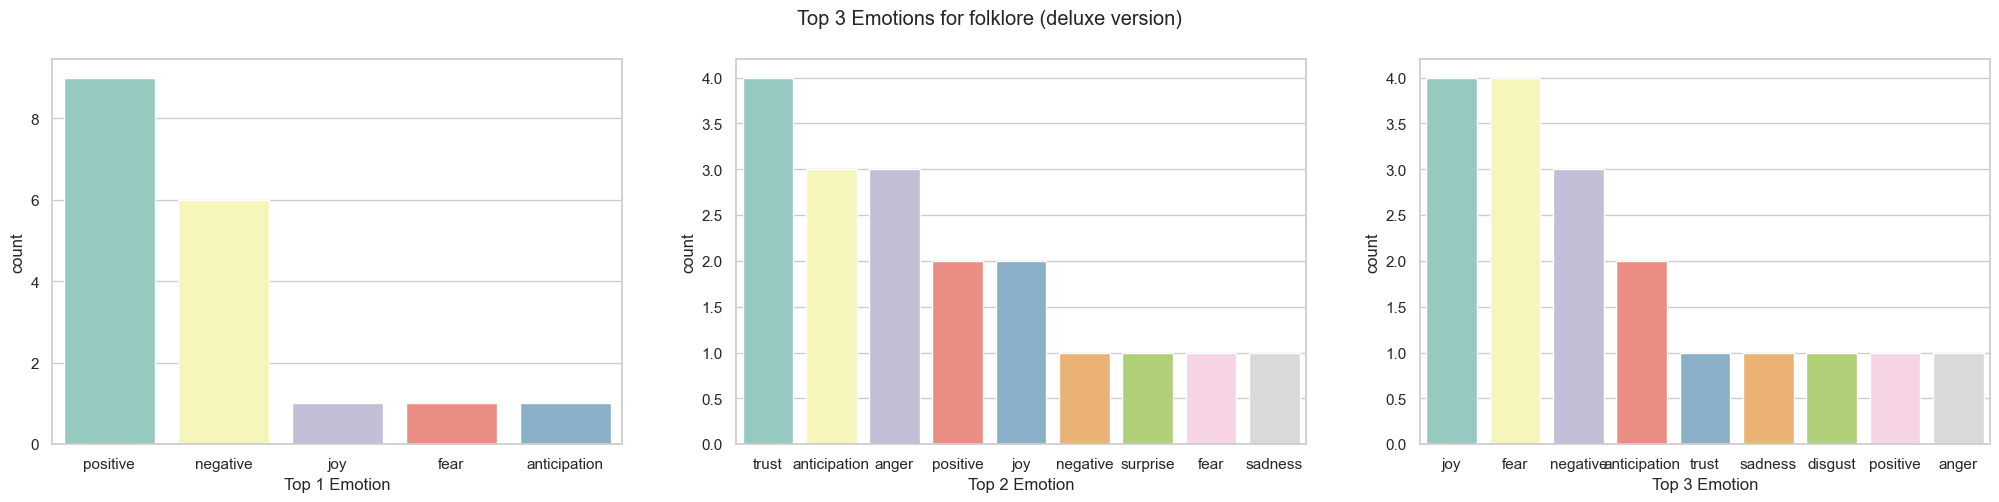

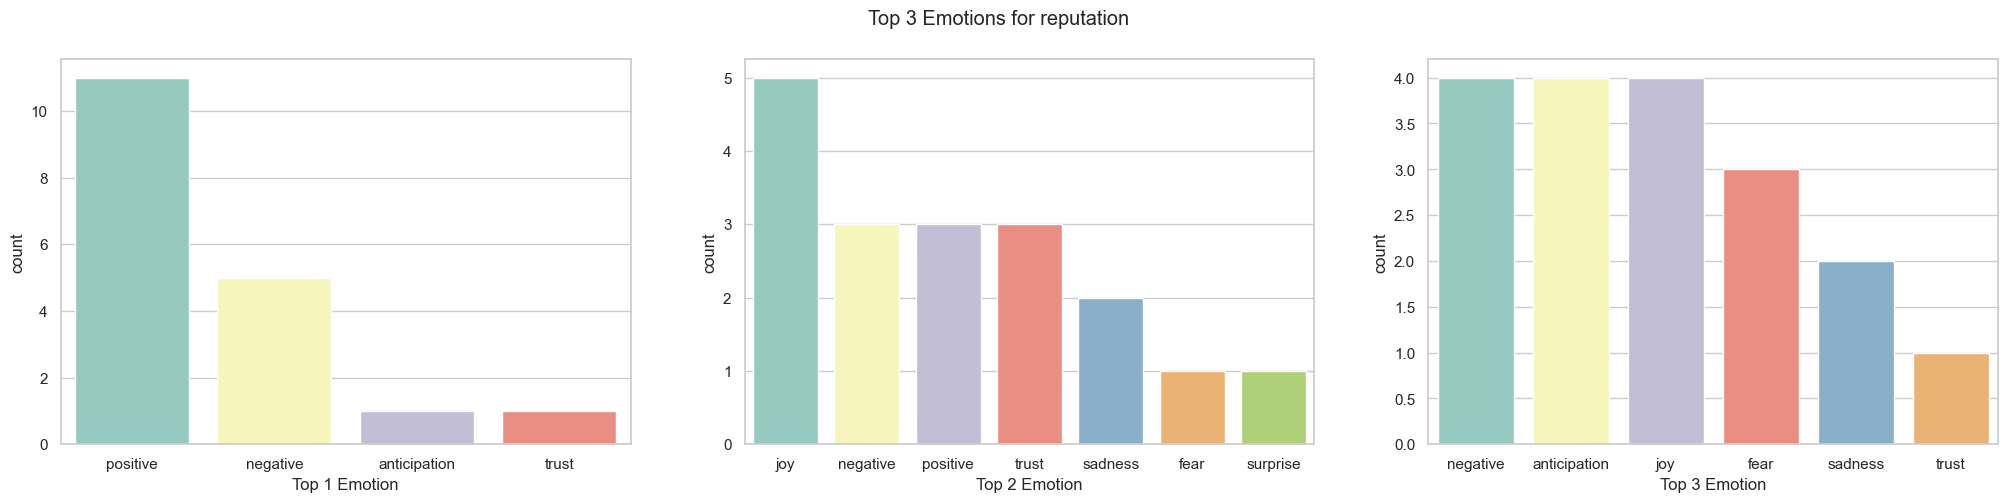

In [105]:
import warnings
warnings.filterwarnings('ignore')
#group by by album and plot emotion
df_grouped = df_copy.groupby('Album')
# Plot the three top emotions for each album
for album, group in df_grouped:
    # print(album)
    # print(group['Top 1 Emotion'].value_counts())
    # print(group['Top 2 Emotion'].value_counts())
    # print(group['Top 3 Emotion'].value_counts())
    # print('')
    fig, ax = plt.subplots(figsize=(25, 5), ncols=3, nrows=1)

    sns.barplot(x=group['Top 1 Emotion'].value_counts().index, y=group['Top 1 Emotion'].value_counts(), hue=group['Top 1 Emotion'].value_counts().index, ax=ax[0], palette=custom_palette, legend=False)
    sns.barplot(x=group['Top 2 Emotion'].value_counts().index, y=group['Top 2 Emotion'].value_counts(), hue=group['Top 2 Emotion'].value_counts().index, ax=ax[1], palette=custom_palette, legend=False)
    sns.barplot(x=group['Top 3 Emotion'].value_counts().index, y=group['Top 3 Emotion'].value_counts(), hue=group['Top 3 Emotion'].value_counts().index, ax=ax[2], palette=custom_palette, legend=False)
    
    fig.suptitle(f'Top 3 Emotions for {album}')
    plt.show()

warnings.resetwarnings()

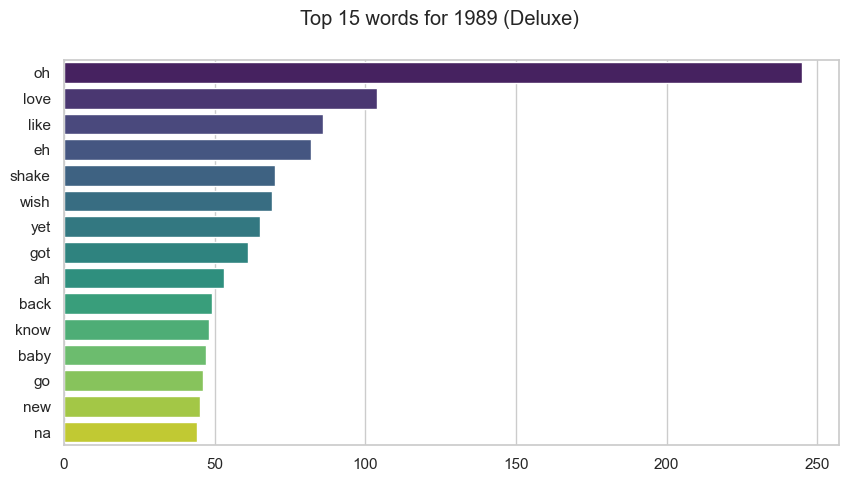

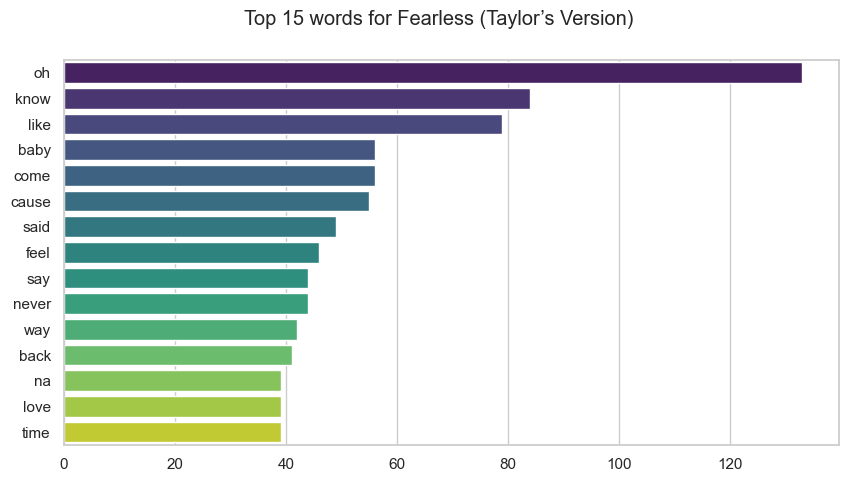

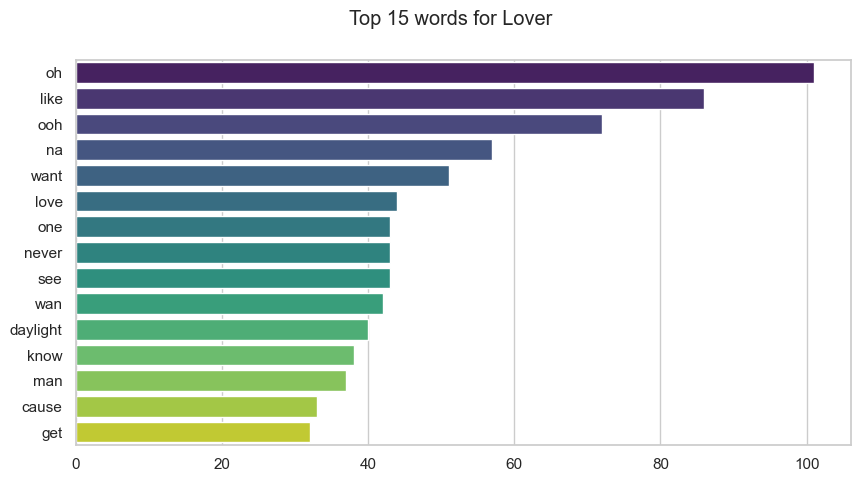

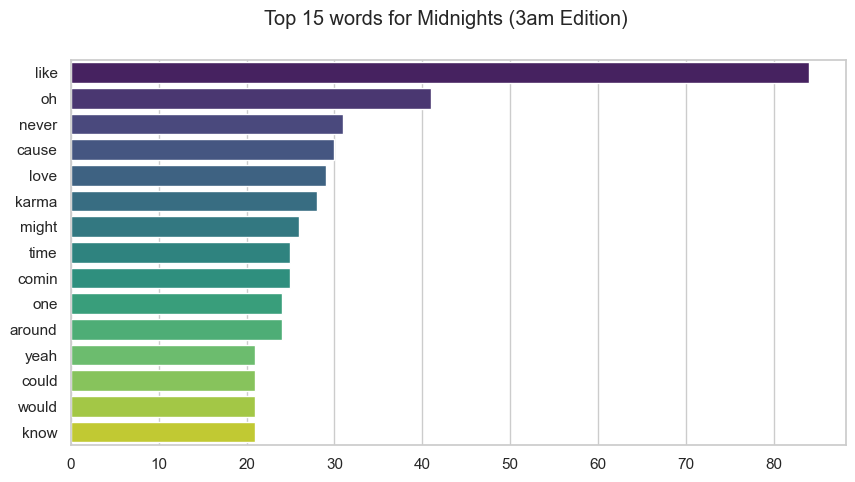

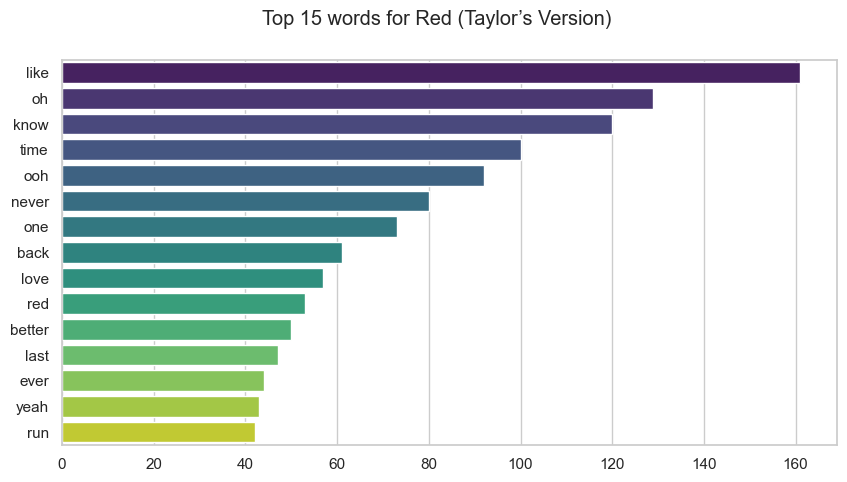

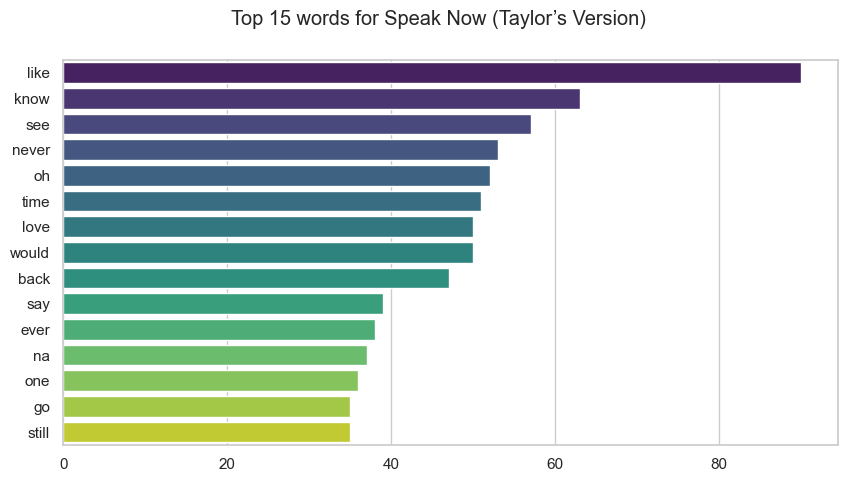

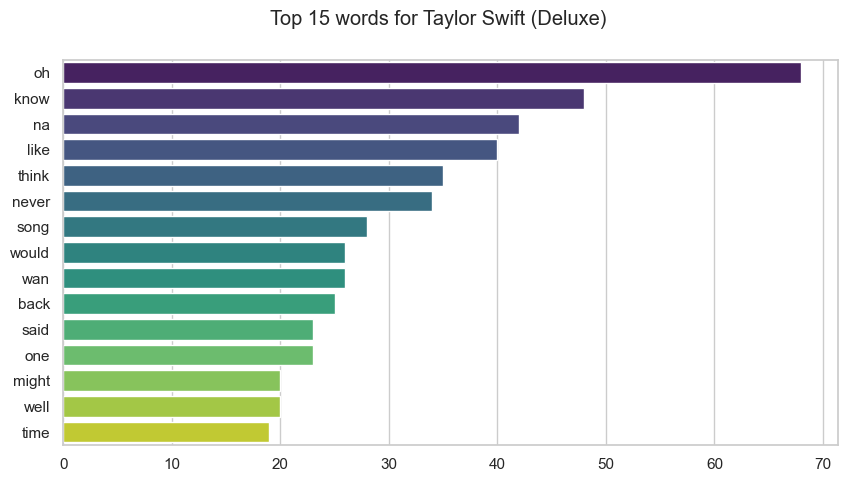

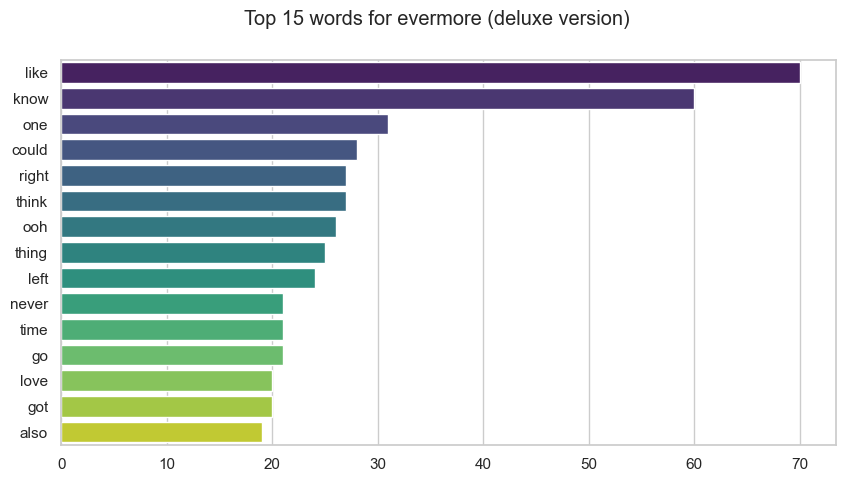

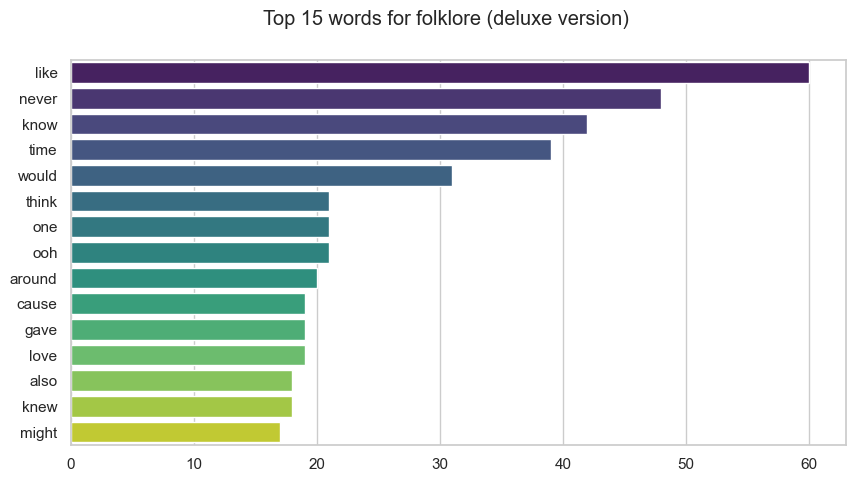

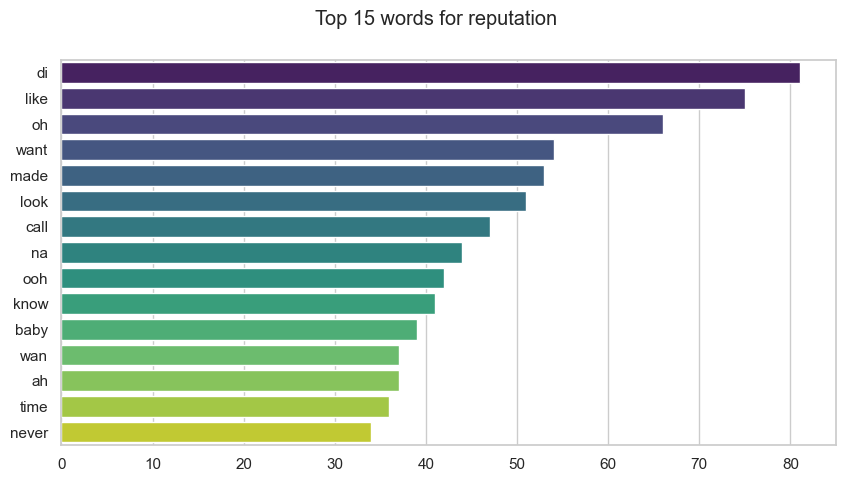

In [111]:
# remove stopwords and plot the most relevant and 15 recurrent words for each album
warnings.filterwarnings('ignore')
for album, group in df_grouped:
    fig, ax = plt.subplots(figsize=(10, 5), ncols=1, nrows=1)
    words = word_tokenize(' '.join(group['Lyrics']).lower())
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    word_freq = nltk.FreqDist(filtered_words)
    word_freq = {k: v for k, v in sorted(word_freq.items(), key=lambda item: item[1], reverse=True)}
    sns.barplot(y=list(word_freq.keys())[:15], x=list(word_freq.values())[:15], ax=ax, orient='h', palette='viridis')
    fig.suptitle(f'Top 15 words for {album}')
    plt.show()
warnings.resetwarnings()